In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

playstore = pd.read_csv("playstore.csv")
playstore = playstore.dropna(subset=['Rating'])

playstore.fillna({
    'Current Ver' : 'Varies with device',
    'Android Ver' : '4.1 and up',
    'Content Rating' : 'Everyone'
},inplace=True)


In [ ]:
#https://jovian.ai/h-pravinharsure/playstore

In [2]:
playstore['Android Ver'].mode()


0    4.1 and up
dtype: object

In [3]:
playstore.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [4]:
playstore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [5]:
playstore['Content Rating'].value_counts()

Everyone           7421
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [6]:
playstore['Price'].str.contains('\$').sum()

647

In [7]:
playstore['Price'] = playstore.Price.str.replace('$','')
playstore['Installs'] = playstore.Installs.str.replace('+','')
playstore['Installs'] = playstore.Installs.str.replace(',','')

In [8]:
playstore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', 'Everyone', '1.20'], dtype=object)

In [9]:
playstore['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1', 'Free'],
      dtype=object)

In [10]:
print (playstore.loc[playstore['Price'] == 'Everyone'])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

              Size Installs Type     Price Content Rating             Genres  \
10472  21516.52952     Free    0  Everyone       Everyone  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up  4.1 and up  


In [11]:
i = playstore[((playstore.Price == 'Everyone'))].index
i

Int64Index([10472], dtype='int64')

In [12]:
playstore.drop(i , inplace = True)

In [13]:
playstore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [14]:
playstore["Price"]= playstore["Price"].astype(float)
playstore["Reviews"]= playstore["Reviews"].astype(int)
playstore["Installs"]= playstore["Installs"].astype(int)

In [15]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

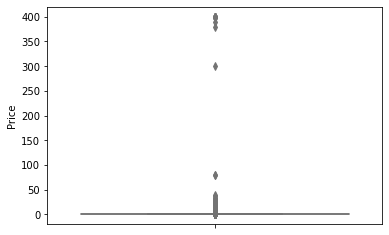

In [16]:
sns.boxplot(y='Price', data=playstore, palette='rainbow');

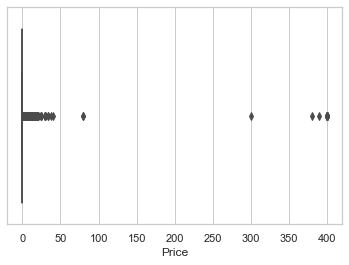

In [17]:
sns.set_theme(style="whitegrid")
plot1 = sns.boxplot(x=playstore["Price"])
plt.show()

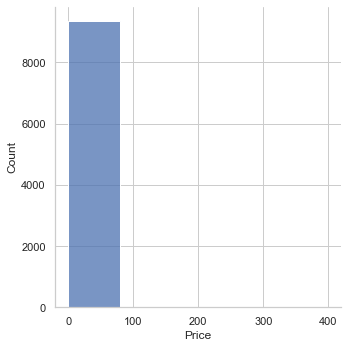

In [18]:
sns.displot(playstore['Price'],bins = 5 , kde = False)

In [20]:
playstore[['Price']].describe()

,Price
count,9366.000000
mean,0.960928
std,15.816585
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


In [26]:
playstore.shape

(9366, 13)

In [29]:
playstore['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [36]:
j = playstore[((playstore.Price > 100))].index
j

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [37]:
playstore.drop(j , inplace = True)

In [38]:
playstore.shape

(9351, 13)

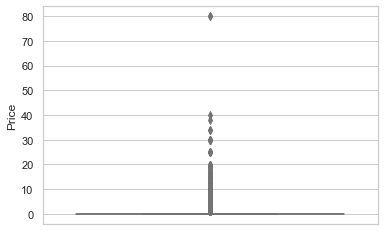

In [40]:
sns.boxplot(y='Price', data=playstore, palette='rainbow');

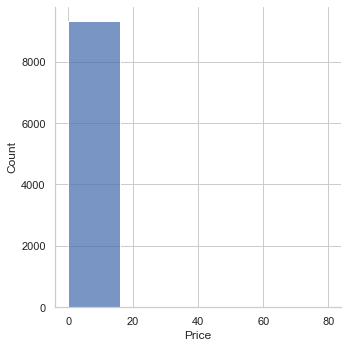

In [41]:
sns.displot(playstore['Price'],bins = 5 , kde = False)

In [48]:
playstore["Reviews"].value_counts()

2           83
3           78
4           74
5           74
1           67
            ..
137144       1
12215        1
17014705     1
10158        1
315390       1
Name: Reviews, Length: 5989, dtype: int64

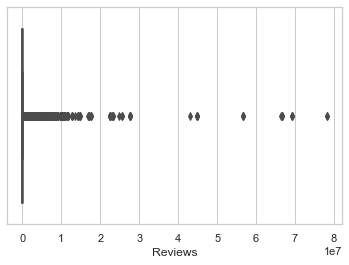

In [42]:
plot2 = sns.boxplot(x=playstore["Reviews"])

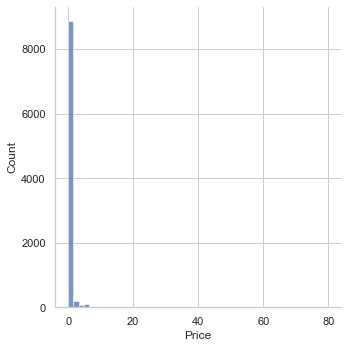

In [44]:
sns.displot(playstore['Price'],bins = 50 , kde = False)

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

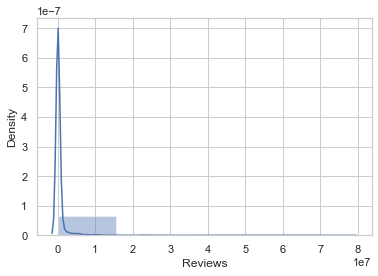

In [46]:
sns.distplot(playstore.Reviews,bins = 5)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

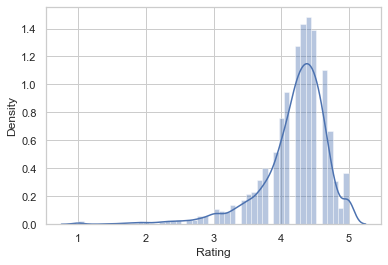

In [47]:
sns.distplot(playstore.Rating)

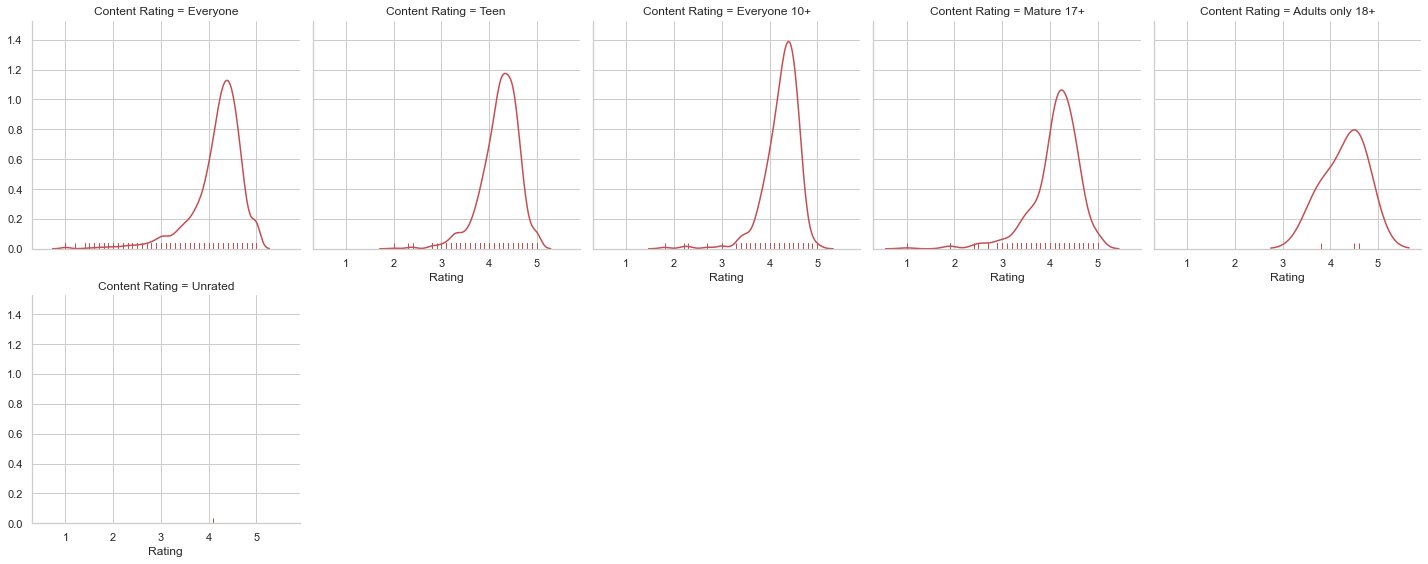

In [49]:
g = sns.FacetGrid(playstore, col='Content Rating', palette="Set1",  col_wrap=5, height=4)
g = (g.map(sns.distplot, "Rating", hist=False, rug=True, color="r"))

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

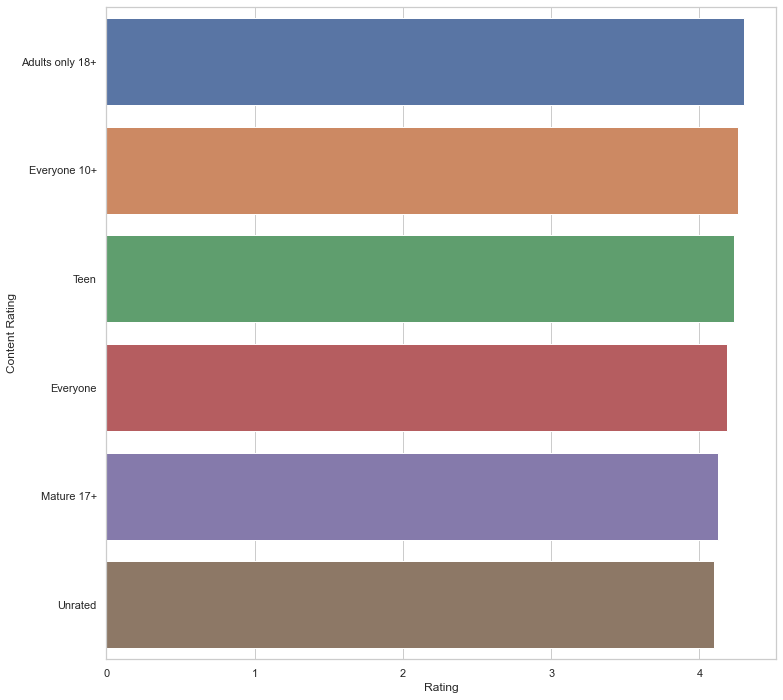

In [50]:
plt.figure(figsize=(12,12))
mean_rat = playstore.groupby(['Content Rating'])['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rat, y=mean_rat.index, data=playstore)

<AxesSubplot:xlabel='Rating', ylabel='Category'>

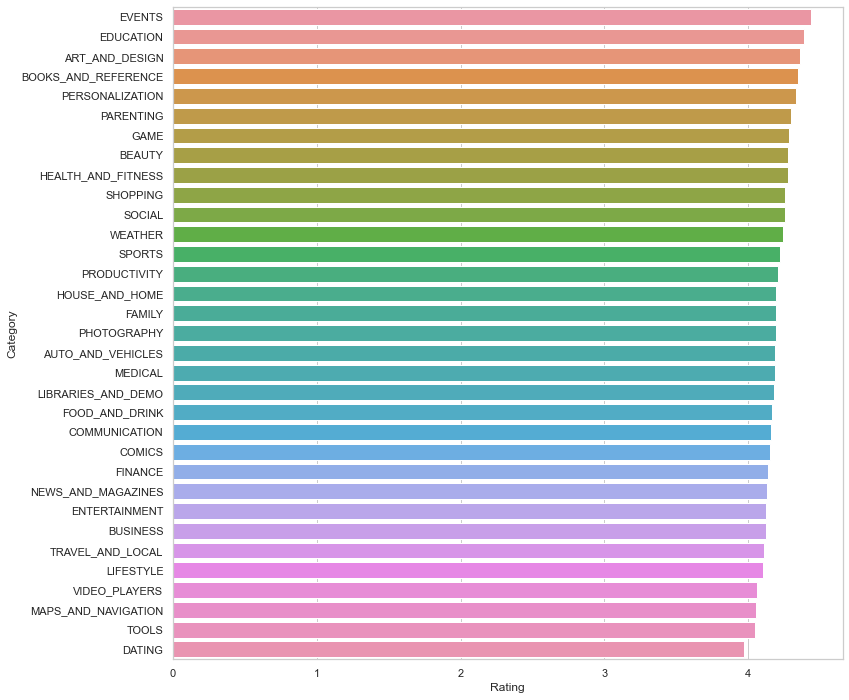

In [52]:
plt.figure(figsize=(12,12))
mean_rat = playstore.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=mean_rat, y=mean_rat.index, data=playstore)

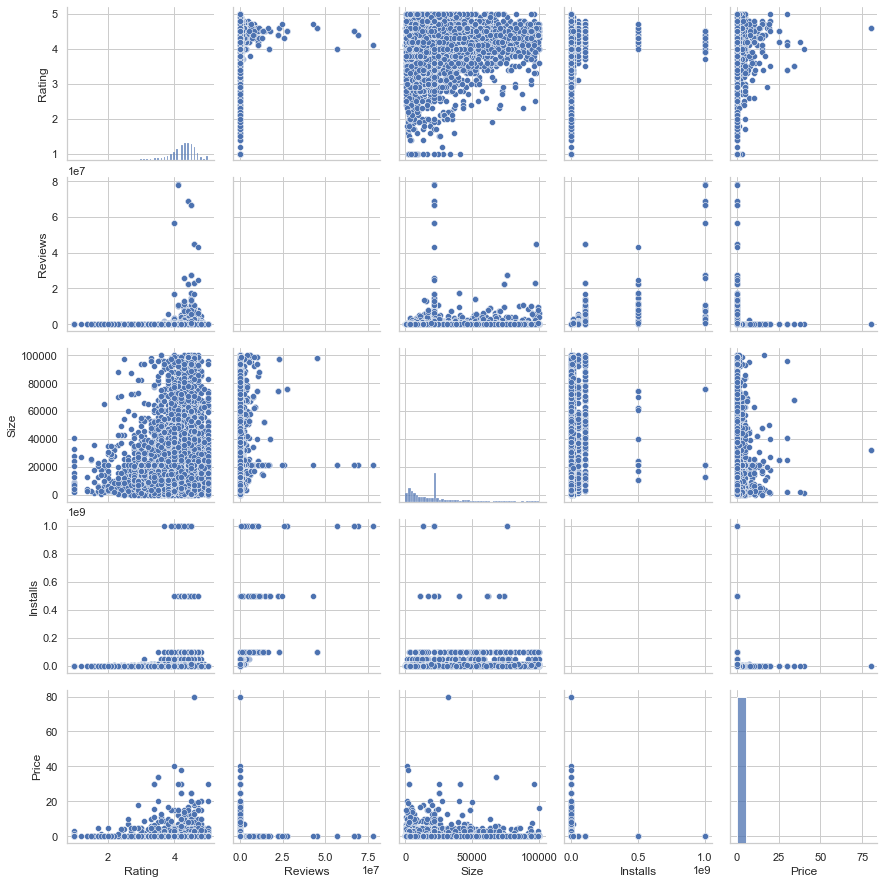

In [59]:
sns.pairplot(playstore)

In [74]:
playstore["Reviews"]= playstore["Reviews"].astype(int)
playstore['Size'] = playstore['Size'].astype(int)
playstore['Last Updated'] = playstore['Last Updated'].astype('datetime64[ns]')


In [75]:

limit_data = playstore[playstore['Reviews'] < 1000000]
limit_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [76]:
limit_data.shape

(8647, 13)

In [77]:
val = playstore.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


In [78]:
x = playstore.Installs.quantile() > val
print (x)

False


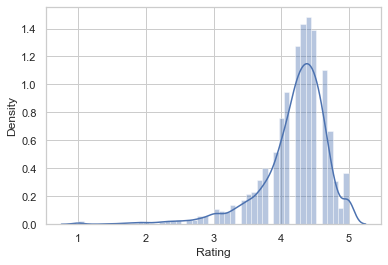

In [79]:
sns.distplot(playstore['Rating'])
plt.show()

In [80]:
playstore['Content Rating'].value_counts()


Everyone           7406
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

<AxesSubplot:ylabel='Content Rating'>

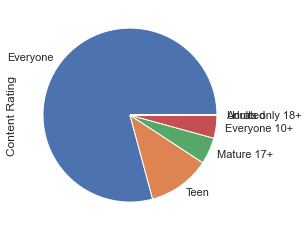

In [83]:
playstore['Content Rating'].value_counts().plot(kind='pie')

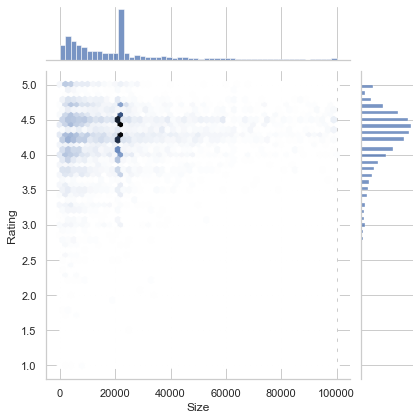

In [85]:
sns.jointplot(x=playstore['Size'],y=playstore['Rating'],data=playstore,kind='hex')
plt.show()

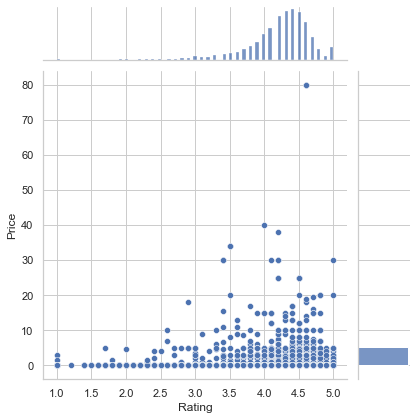

In [86]:
sns.jointplot(x ="Rating" , y = "Price" ,data = playstore)
plt.show()


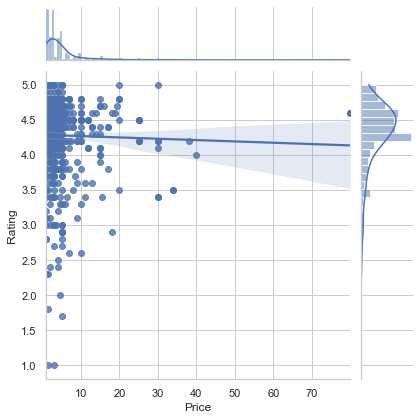

In [87]:
Price_greaterthan_zero = playstore[playstore['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

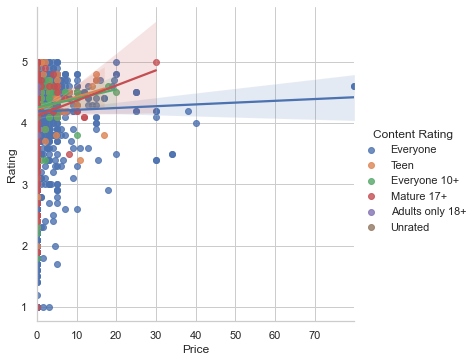

In [89]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=playstore)
plt.show()

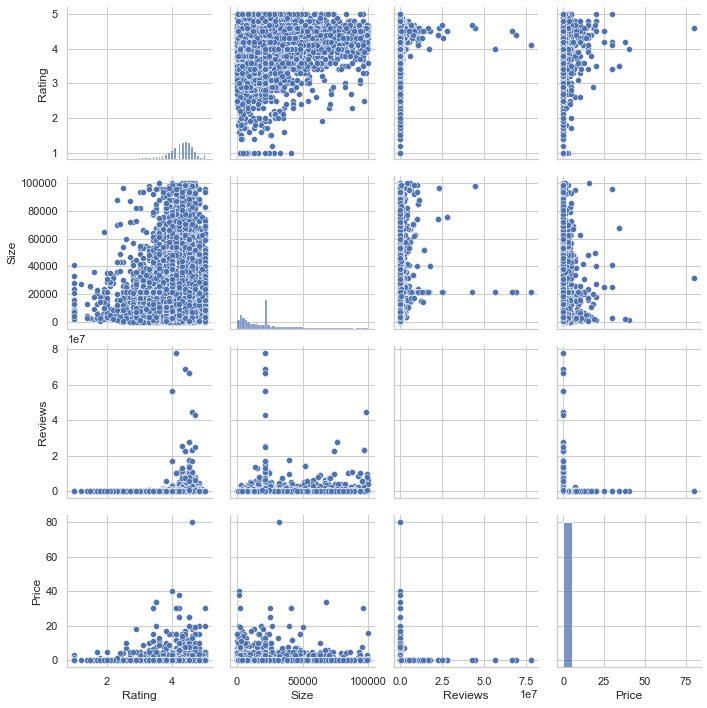

In [90]:
sns.pairplot(playstore,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

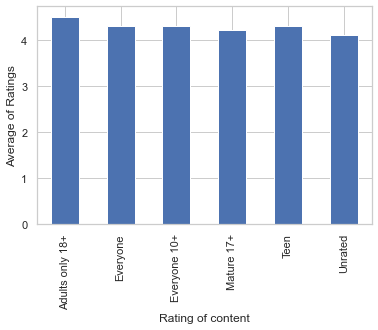

In [92]:
a = playstore['Rating'].groupby(playstore['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

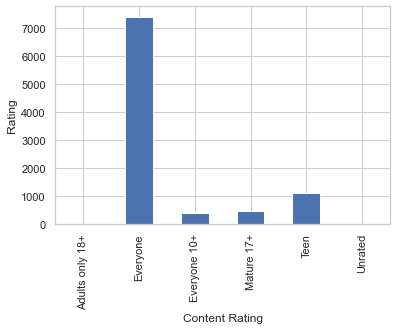

In [93]:
playstore.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

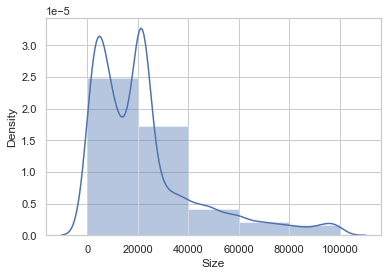

In [94]:
sns.distplot(playstore["Size"], bins=5)
plt.show()